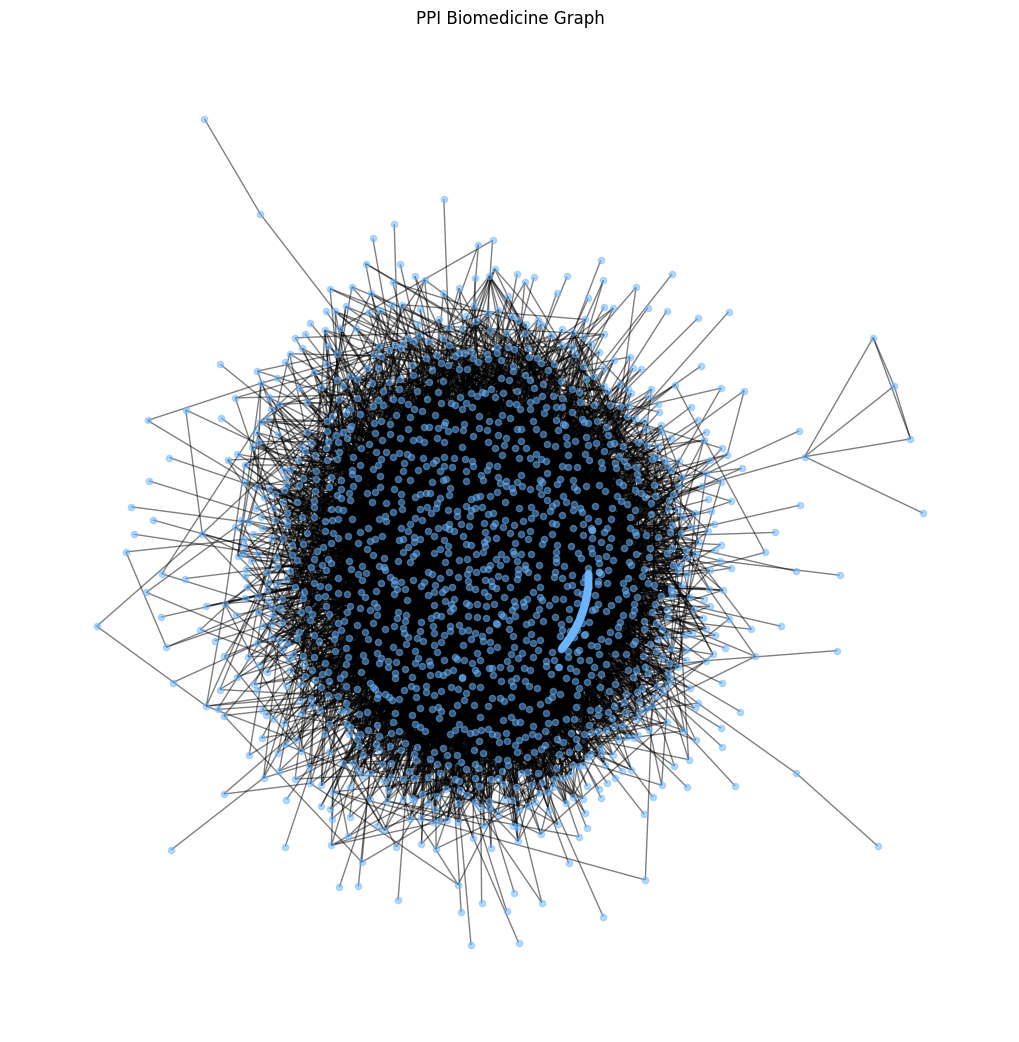

In [5]:
from torch_geometric.datasets import PPI
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
local_data_root = '/Users/hl.zuo/Documents/Yale course/Yale independent project/GraphTransformer/DatasetVis/data/'
# Download dataset
ppi_data = PPI(root=local_data_root + 'ppi')

# Convert to networkx graph
ppi_graph = to_networkx(ppi_data[0], to_undirected=True)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(ppi_graph, node_size=20, node_color="#6CB6FF", alpha=0.5, pos=nx.kamada_kawai_layout(ppi_graph))
plt.title("PPI Biomedicine Graph")
plt.show()


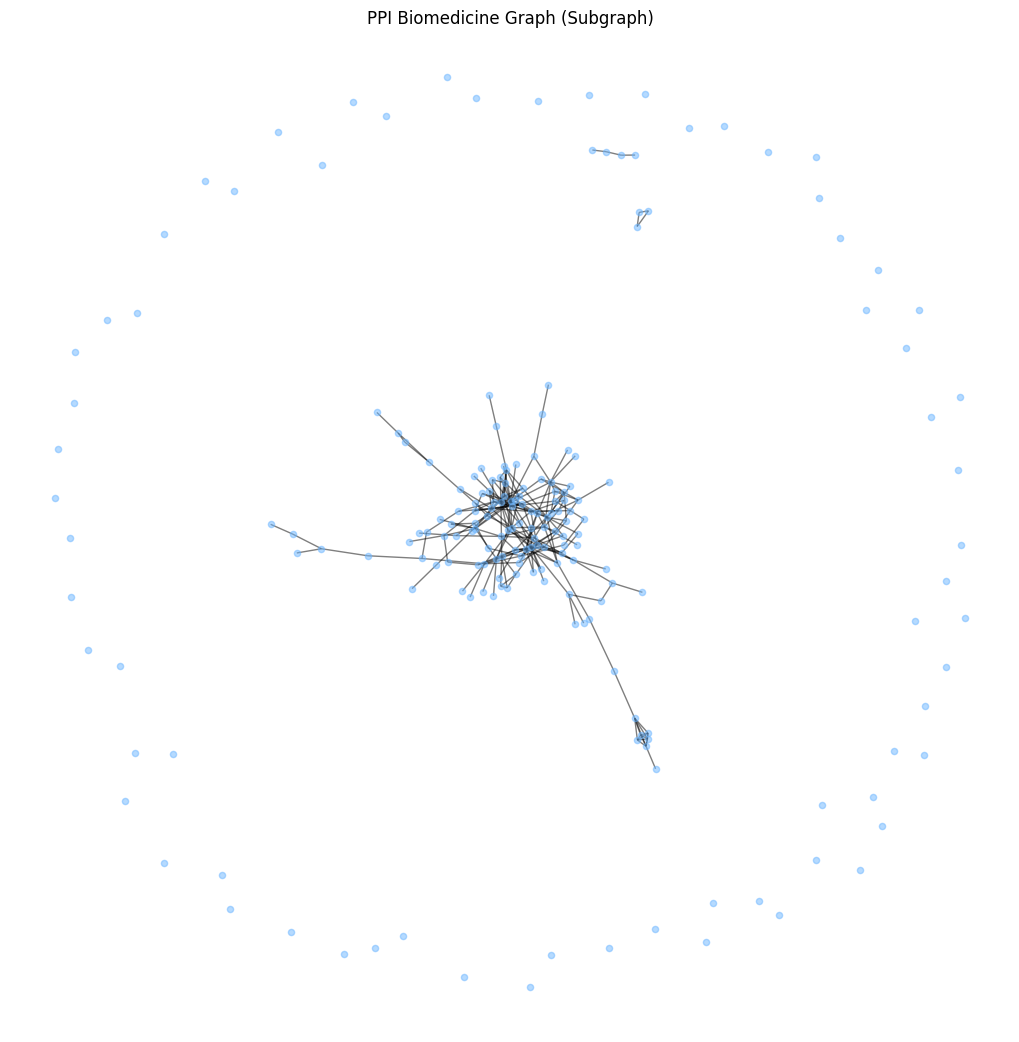

In [7]:
from torch_geometric.datasets import PPI
import torch
import networkx as nx
import matplotlib.pyplot as plt
import torch_geometric

# 下载 PPI 数据集
local_data_root = '/Users/hl.zuo/Documents/Yale course/Yale independent project/GraphTransformer/DatasetVis/data/'
ppi_data = PPI(root=local_data_root + 'ppi')

# 截取前 200 个节点以及相应的边
subgraph_nodes = torch.arange(0, 200)  # 前200个节点
subgraph_edge_index = ppi_data[0].edge_index
mask = (subgraph_edge_index[0] < 200) & (subgraph_edge_index[1] < 200)  # 仅考虑在前200个节点之间的边
subgraph_edge_index = subgraph_edge_index[:, mask]

# 创建一个新的 PyTorch Geometric 数据对象
subgraph_data = torch_geometric.data.Data(edge_index=subgraph_edge_index)

# 转换为 networkx 图
subgraph_nx = to_networkx(subgraph_data, to_undirected=True)

# 使用 kamada_kawai_layout 布局算法进行可视化
plt.figure(figsize=(10, 10))
nx.draw(subgraph_nx, node_size=20, node_color="#6CB6FF", alpha=0.5, pos=nx.kamada_kawai_layout(subgraph_nx))
plt.title("PPI Biomedicine Graph (Subgraph)")
plt.show()
